<a href="https://colab.research.google.com/github/Bhavana123448/NLP1/blob/main/2403A54069_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install gensim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import gensim.downloader as api

In [10]:
print("Loading model... Please wait.")
model = api.load("glove-wiki-gigaword-100")  # 100-dimensional vectors

print("Model loaded successfully!")

# Print vocabulary size
print("Vocabulary Size:", len(model))

# Display one example vector
word = "king"
print(f"\nVector for '{word}':\n")
print(model[word])
print("\nVector dimension:", len(model[word]))


Loading model... Please wait.
Model loaded successfully!
Vocabulary Size: 400000

Vector for 'king':

[-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52506  -1.7357    0.4751   -0.7048

In [11]:
words = [
    # Animals
    "dog", "cat", "lion", "tiger", "wolf", "elephant", "horse", "monkey",

    # Fruits
    "apple", "banana", "mango", "grape", "orange", "pineapple", "pear", "peach",

    # Countries
    "india", "china", "france", "germany", "japan", "brazil", "canada", "italy",

    # Cities
    "delhi", "mumbai", "paris", "berlin", "tokyo", "rome", "toronto", "beijing",

    # Technology
    "computer", "laptop", "keyboard", "mouse", "internet", "software", "hardware", "mobile",

    # Vehicles
    "car", "bus", "train", "bicycle", "airplane", "truck", "scooter", "motorcycle"
]


In [12]:
vectors = []

valid_words = []

for word in words:
    if word in model:
        vectors.append(model[word])
        valid_words.append(word)
    else:
        print(f"{word} not found in vocabulary")

vectors = np.array(vectors)

print("Total valid words:", len(valid_words))
print("Vector shape:", vectors.shape)


Total valid words: 48
Vector shape: (48, 100)


In [13]:
tsne = TSNE(n_components=2, random_state=42, perplexity=10)

reduced_vectors = tsne.fit_transform(vectors)

print("Shape after reduction:", reduced_vectors.shape)


Shape after reduction: (48, 2)


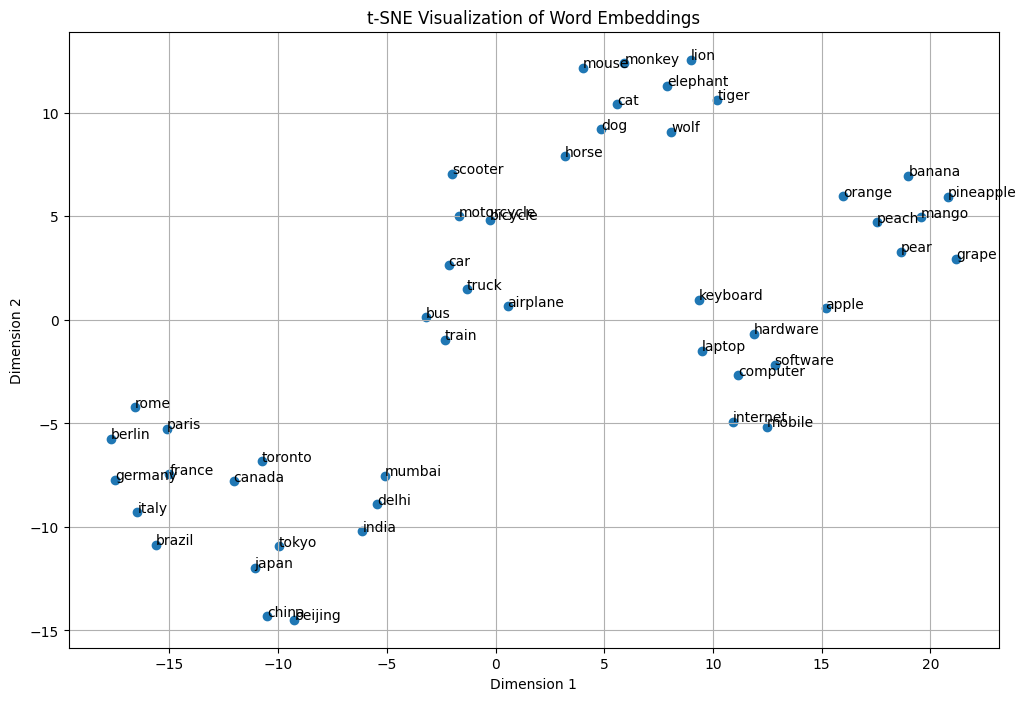

In [14]:
# STEP 6: Plot the embeddings

plt.figure(figsize=(12, 8))

x = reduced_vectors[:, 0]
y = reduced_vectors[:, 1]

plt.scatter(x, y)

# Annotate each word
for i, word in enumerate(valid_words):
    plt.annotate(word, (x[i], y[i]))

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()
